https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial/notebook

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
assert not np.isnan(x_train).any()

In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [5]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


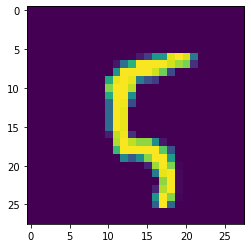

In [6]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [7]:
batch_size = 64
num_classes = 10
epochs = 5
def prepareModel(name, model):
    print(name)
    history = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1)
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training Loss")
    ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss", axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
    ax[1].plot(history.history['val_acc'], color='r', label="Validation Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    plt.show()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('accuracy\t', test_acc)
    return test_acc

In [8]:
models = []

def populate():
    def builder():
        model = tf.keras.models.Sequential([
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(4, 6, padding='same', input_shape=input_shape),
            tf.keras.layers.Conv2D(3, 3, padding='same', input_shape=input_shape),
            tf.keras.layers.Conv2D(2, 5, padding='same', input_shape=input_shape),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['acc'])
        return model
    models.append(builder)

    def builder():
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(2, 3, padding='same', input_shape=input_shape),
            tf.keras.layers.Conv2D(1, 4, padding='same', input_shape=input_shape),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['acc'])
        return model
    models.append(builder)
    
    def builder():
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(1, 5, padding='same', input_shape=input_shape),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['acc'])
        return model
    models.append(builder)
    
populate()

0
Epoch 1/5
844/844 [==============================] - 13s 13ms/step - loss: 0.7001 - acc: 0.7795 - val_loss: 0.3322 - val_acc: 0.8990
Epoch 2/5
844/844 [==============================] - 10s 12ms/step - loss: 0.3850 - acc: 0.8834 - val_loss: 0.2942 - val_acc: 0.9150
Epoch 3/5
844/844 [==============================] - 10s 12ms/step - loss: 0.3601 - acc: 0.8917 - val_loss: 0.2789 - val_acc: 0.9175
Epoch 4/5
844/844 [==============================] - 10s 12ms/step - loss: 0.3469 - acc: 0.8964 - val_loss: 0.2759 - val_acc: 0.9197
Epoch 5/5
844/844 [==============================] - 10s 12ms/step - loss: 0.3386 - acc: 0.8996 - val_loss: 0.2717 - val_acc: 0.9207


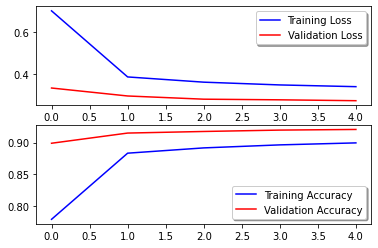

313/313 [==============================] - 1s 4ms/step - loss: 0.3137 - acc: 0.9074
accuracy	 0.9074000120162964
1
Epoch 1/5
844/844 [==============================] - 13s 15ms/step - loss: 0.9280 - acc: 0.6917 - val_loss: 0.3191 - val_acc: 0.9075
Epoch 2/5
844/844 [==============================] - 12s 15ms/step - loss: 0.3719 - acc: 0.8894 - val_loss: 0.2911 - val_acc: 0.9135
Epoch 3/5
844/844 [==============================] - 12s 15ms/step - loss: 0.3411 - acc: 0.8984 - val_loss: 0.2730 - val_acc: 0.9198
Epoch 4/5
844/844 [==============================] - 12s 15ms/step - loss: 0.3266 - acc: 0.9041 - val_loss: 0.2590 - val_acc: 0.9263
Epoch 5/5
844/844 [==============================] - 12s 14ms/step - loss: 0.3177 - acc: 0.9071 - val_loss: 0.2522 - val_acc: 0.9267


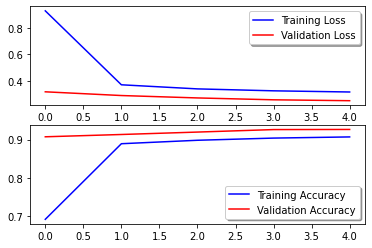

313/313 [==============================] - 1s 4ms/step - loss: 0.2989 - acc: 0.9137
accuracy	 0.9136999845504761
2
Epoch 1/5
844/844 [==============================] - 9s 11ms/step - loss: 1.0871 - acc: 0.6345 - val_loss: 0.3534 - val_acc: 0.8952
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.3999 - acc: 0.8811 - val_loss: 0.3047 - val_acc: 0.9083
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.3603 - acc: 0.8933 - val_loss: 0.2789 - val_acc: 0.9178
Epoch 4/5
844/844 [==============================] - 9s 10ms/step - loss: 0.3424 - acc: 0.8990 - val_loss: 0.2717 - val_acc: 0.9203
Epoch 5/5
844/844 [==============================] - 9s 10ms/step - loss: 0.3310 - acc: 0.9032 - val_loss: 0.2663 - val_acc: 0.9213


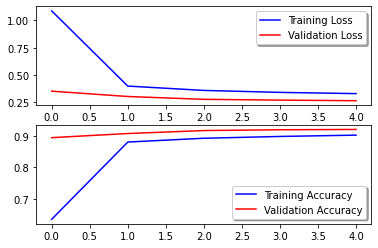

313/313 [==============================] - 1s 4ms/step - loss: 0.3036 - acc: 0.9110
accuracy	 0.9110000133514404


In [9]:
bestAcc = 0
bestM = None
for i, m in zip(range(0, 10**19), models):
    mod = m()
    acc = prepareModel(str(i), mod)
    if acc > bestAcc:
        bestAcc = acc
        bestM = (m, mod)

In [10]:
print(bestAcc)
model = bestM[1]

0.9136999845504761


In [11]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)

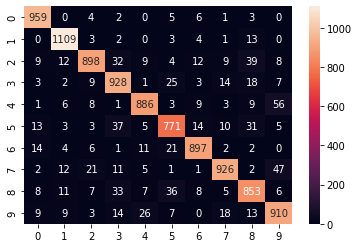

In [12]:
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.show()

In [18]:
Y_pred_norm = np.array(list(map(lambda x: x / np.sum(x), Y_pred)))
mat = [[(0, None)] * 10 for i in range(10)]
def upd(j, ind):
    i = Y_true[ind]
    val = Y_pred_norm[ind][j]
    if val > mat[i][j][0]:
        mat[i][j] = (val, x_test[ind])
for ind in range(len(Y_pred)):
    for j in range(10):
        upd(j, ind)

In [ ]:
# def log #390

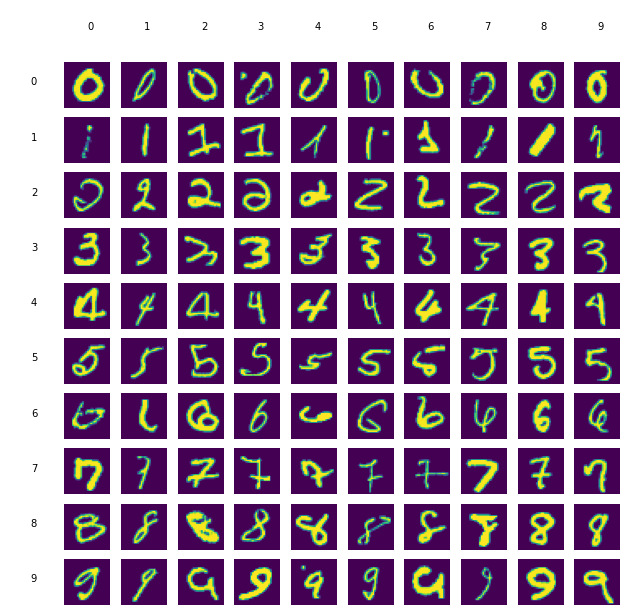

In [19]:
ys = list(zip(Y_pred_classes, Y_true, x_test))
fig = plt.figure(figsize=(11, 11))
for i in range(10):
    fig.add_subplot(11, 11, i + 2)
    plt.axis('off')
    plt.text(0.5, 0.5, str(i))
    fig.add_subplot(11, 11, (i + 1) * 11 + 1)
    plt.axis('off')
    plt.text(0.5, 0.5, str(i))
for j in range(10):
    for i in range(10):
        fig.add_subplot(11, 11, (i + 1) * 11 + j + 2)
        plt.axis('off')
        # res = next((im for yi, yj, im in ys if yi == i and yj == j), None)
        res = mat[i][j][1]
        if res is not None:
            plt.imshow(res)
plt.show()

In [20]:
"""
Y_pred_norm = np.array(list(map(lambda x: x / np.sum(x), Y_pred)))
print(np.sum((Y_pred_norm - Y_pred) > 1e-8))
np.argmax(Y_pred_norm[Y_true == 5], axis=1)
""";

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()

In [22]:
assert not np.isnan(fashion_x_train).any()
fashion_y_train = tf.one_hot(fashion_y_train.astype(np.int32), depth=10)
fashion_y_test = tf.one_hot(fashion_y_test.astype(np.int32), depth=10)

In [23]:
input_shape = (28, 28, 1)

fashion_x_train = fashion_x_train.reshape(fashion_x_train.shape[0], fashion_x_train.shape[1], fashion_x_train.shape[2], 1)
fashion_x_train = fashion_x_train / 255.0
fashion_x_test = fashion_x_test.reshape(fashion_x_test.shape[0], fashion_x_test.shape[1], fashion_x_test.shape[2], 1)
fashion_x_test = fashion_x_test/255.0

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


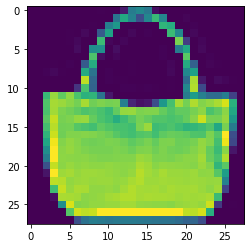

In [24]:
plt.imshow(fashion_x_train[100][:,:,0])
print(fashion_y_train[100])

In [25]:
model = bestM[0]()
model.fit(fashion_x_train, fashion_y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)
test_loss, test_acc = model.evaluate(fashion_x_test, fashion_y_test)
print('accuracy\t', test_acc)

Epoch 1/5
844/844 [==============================] - 13s 15ms/step - loss: 0.9861 - acc: 0.6408 - val_loss: 0.6401 - val_acc: 0.7733
Epoch 2/5
844/844 [==============================] - 13s 15ms/step - loss: 0.6091 - acc: 0.7836 - val_loss: 0.5986 - val_acc: 0.7960
Epoch 3/5
844/844 [==============================] - 13s 15ms/step - loss: 0.5595 - acc: 0.8033 - val_loss: 0.5415 - val_acc: 0.8087
Epoch 4/5
844/844 [==============================] - 13s 15ms/step - loss: 0.5347 - acc: 0.8104 - val_loss: 0.5165 - val_acc: 0.8167
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5497 - acc: 0.8017
accuracy	 0.8016999959945679


In [26]:
Y_pred = model.predict(fashion_x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(fashion_y_test,axis = 1)

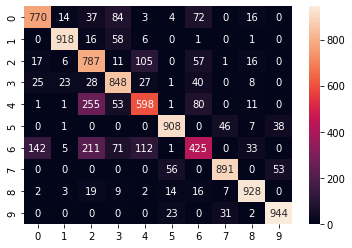

In [27]:
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.show()

In [30]:
Y_pred_norm = np.array(list(map(lambda x: x / np.sum(x), Y_pred)))
mat = [[(0, None)] * 10 for i in range(10)]
def upd(j, ind):
    i = Y_true[ind]
    val = Y_pred_norm[ind][j]
    if val > mat[i][j][0]:
        mat[i][j] = (val, fashion_x_test[ind])
for ind in range(len(Y_pred)):
    for j in range(10):
        upd(j, ind)

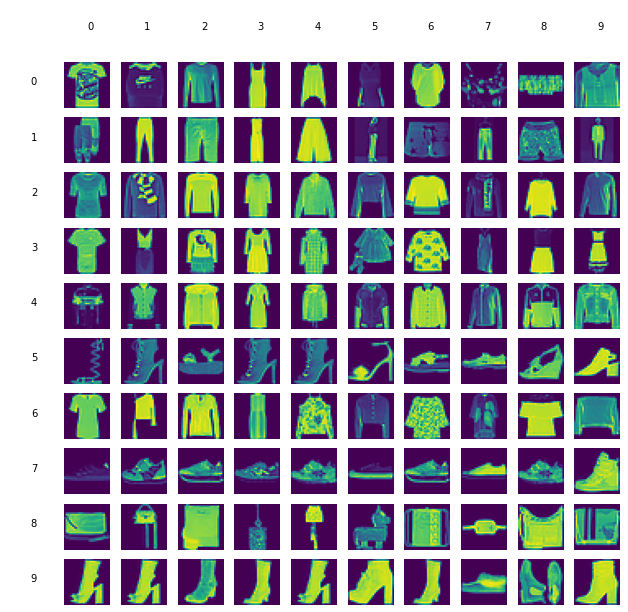

In [31]:
ys = list(zip(Y_pred_classes, Y_true, x_test))
fig = plt.figure(figsize=(11, 11))
for i in range(10):
    fig.add_subplot(11, 11, i + 2)
    plt.axis('off')
    plt.text(0.5, 0.5, str(i))
    fig.add_subplot(11, 11, (i + 1) * 11 + 1)
    plt.axis('off')
    plt.text(0.5, 0.5, str(i))
for j in range(10):
    for i in range(10):
        fig.add_subplot(11, 11, (i + 1) * 11 + j + 2)
        plt.axis('off')
        # res = next((im for yi, yj, im in ys if yi == i and yj == j), None)
        res = mat[i][j][1]
        if res is not None:
            plt.imshow(res)
plt.show()